## This Code is meant to visualise and explore how the Multiple Linear Regression works

In [1]:
########################################### This script is for the simulation of MLR fitting ###########################################
######################### This can be used to inspect the behaviour of MLR parameters under different conditions ###########################################
import numpy as np
import matplotlib.pyplot as plt

Number of trials with negative coefficients: 24/50


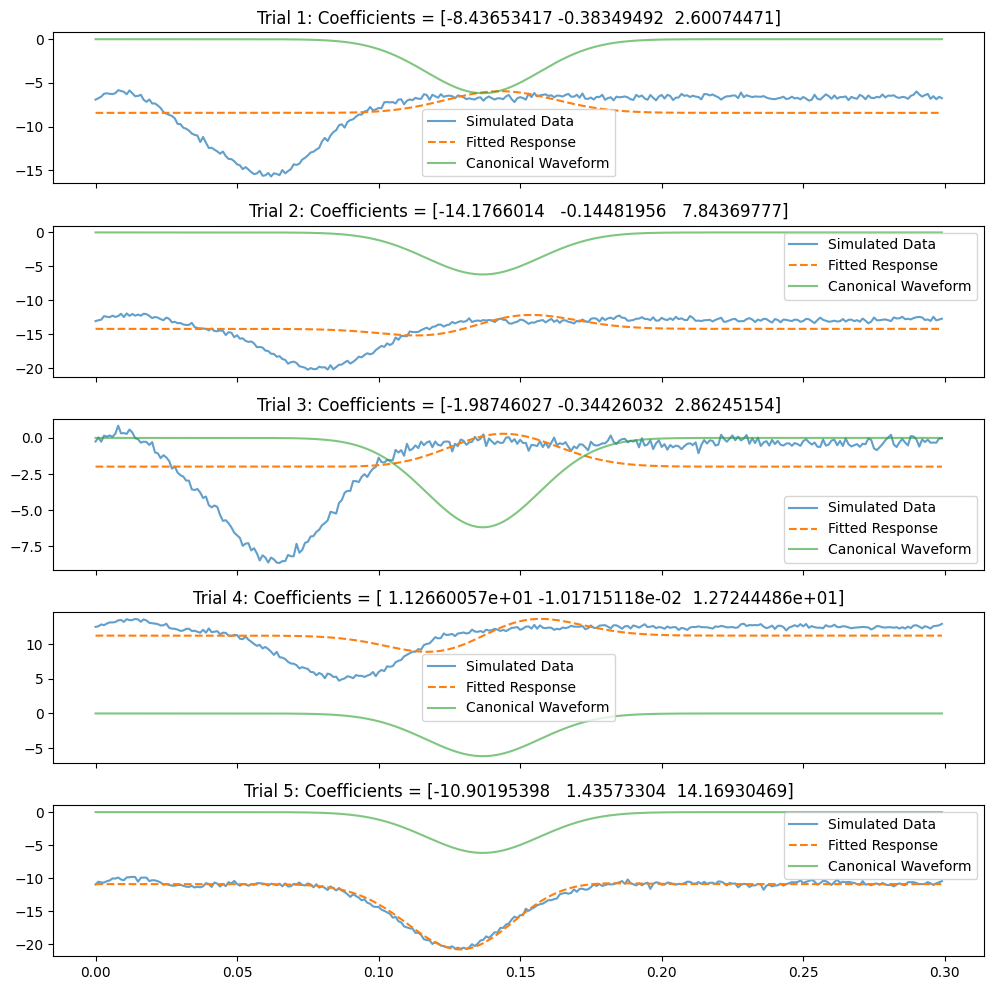

Mean peak error: 3.3313
Standard deviation of peak error: 2.7940


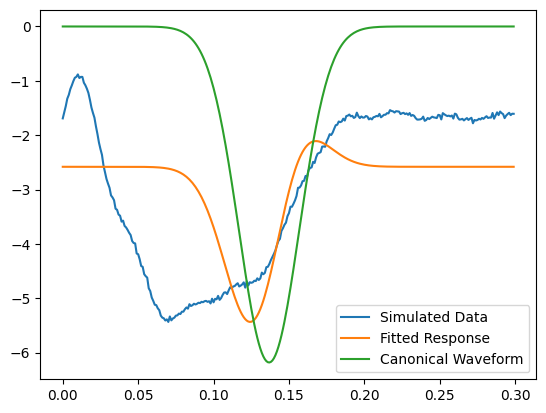

In [2]:
# Define the canonical waveform (e.g., a simple negative peak like an ERP)
fs = 1000  # Sampling rate (Hz)
duration = 0.3  # Duration of the waveform (seconds)
times = np.linspace(0, duration, int(fs * duration), endpoint=False)
canonical_waveform = -np.exp(-((times - 0.1) ** 2) / (2 * (0.02 ** 2))) * 10

# Simulate single-trial data
n_trials = 50
noise_level = 0.2  # Noise standard deviation
latency = np.random.uniform(0.05,0.15,n_trials)
simulated_data = np.zeros((n_trials, len(times)))
for i in range(n_trials):
    canonical_waveform = -np.exp(-((times - latency[i]) ** 2) / (2 * (0.02 ** 2))) * np.random.uniform(5,10)
    simulated_data[i, :] = canonical_waveform + noise_level * np.random.randn(len(times))
    for freq in np.arange(10,30,1):
        amplitude = np.random.uniform(0,.1)
        sine_wave = amplitude * np.sin(2 * np.pi * freq * times)
        sine_wave += np.random.uniform(-5, 5)
        simulated_data[i, :] += sine_wave

# Set up the regressors
regressor = canonical_waveform
regressor_derivative = np.concatenate([[0], np.diff(regressor)])
regressors = np.vstack([regressor, regressor_derivative]).T

# Add intercept if desired
with_intercept = True
if with_intercept:
    intercept = np.ones((len(regressor), 1))
    regressors = np.hstack([intercept, regressors])

# Perform multiple linear regression
beta = np.zeros((n_trials, regressors.shape[1]))
fitted_responses = np.zeros_like(simulated_data)

for trial in range(n_trials):
    y = simulated_data[trial, :]
    beta[trial, :], _, _, _ = np.linalg.lstsq(regressors, y, rcond=None)
    fitted_responses[trial, :] = np.dot(regressors, beta[trial, :])

# Analyze the results
negative_coefficients = np.sum(beta[:, 1] < 0 if with_intercept else beta[:, 0] < 0)
print(f"Number of trials with negative coefficients: {negative_coefficients}/{n_trials}")

# Plot a few trials
n_to_plot = 5
fig, axes = plt.subplots(n_to_plot, 1, figsize=(10, 10), sharex=True)
for i in range(n_to_plot):
    axes[i].plot(times, simulated_data[i, :], label="Simulated Data", alpha=0.7)
    axes[i].plot(times, fitted_responses[i, :], label="Fitted Response", linestyle="--")
    axes[i].plot(times, canonical_waveform, label="Canonical Waveform", alpha=0.6)
    axes[i].set_title(f"Trial {i+1}: Coefficients = {beta[i, :]}")
    axes[i].legend()

plt.tight_layout()
plt.show()

# Evaluate peak fitting
true_peaks = np.min(simulated_data, axis=1)
fitted_peaks = np.min(fitted_responses, axis=1)
peak_error = np.abs(true_peaks - fitted_peaks)

print(f"Mean peak error: {np.mean(peak_error):.4f}")
print(f"Standard deviation of peak error: {np.std(peak_error):.4f}")

plt.plot(times, simulated_data.mean(axis=0), label="Simulated Data")
plt.plot(times, fitted_responses.mean(axis=0), label="Fitted Response")
plt.plot(times, canonical_waveform, label="Canonical Waveform")
plt.legend()
plt.show()

Number of trials with negative coefficients: 11/50


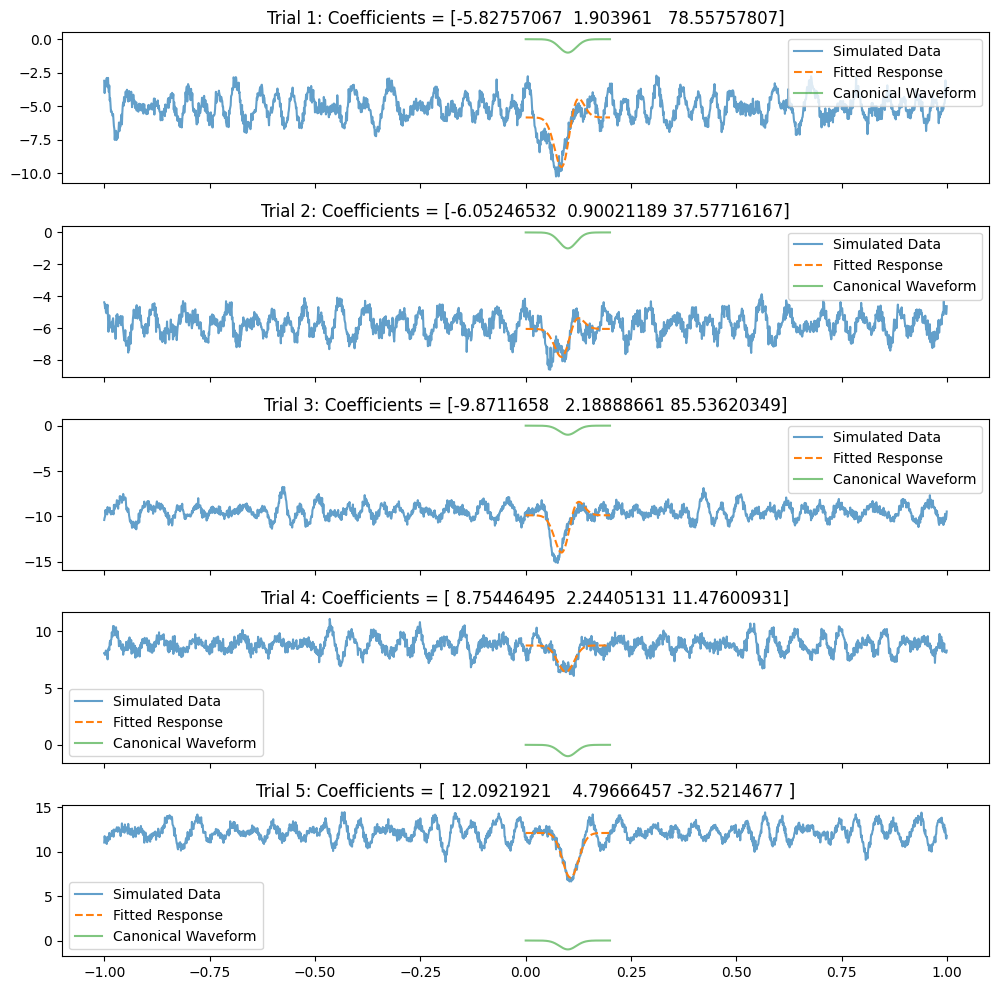

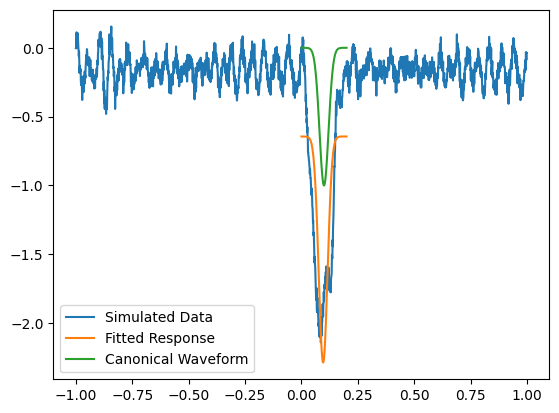

In [50]:

import numpy as np
import matplotlib.pyplot as plt

# Define the extended epoch
fs = 1000  # Sampling rate (Hz)
epoch_duration = 2.0  # Duration of the epoch (seconds, from -1 to +1)
times = np.linspace(-1, 1, int(fs * epoch_duration), endpoint=False)

# Create a canonical waveform: a negative Gaussian-like peak centered at 0
canonical_waveform = -np.exp(-((times - 0.10) ** 2) / (2 * (0.02 ** 2))) 

# Simulate single-trial data
n_trials = 50
noise_level = 0.3  # Noise standard deviation
latencies = np.random.uniform(0.05, 0.15, n_trials)  # Latencies centered around 0
simulated_data = np.zeros((n_trials, len(times)))
for i in range(n_trials):
    trial_waveform = -np.exp(-((times - latencies[i]) ** 2) / (2 * (0.02 ** 2))) * np.random.uniform(2, 5)
    simulated_data[i, :] = trial_waveform + noise_level * np.random.randn(len(times))
    for freq in np.arange(10, 30, 1):  # Add random sine waves
        amplitude = np.random.uniform(0, 0.4)
        phase = np.random.uniform(0, 2 * np.pi)
        sine_wave = amplitude * np.sin(2 * np.pi * freq * times + phase) + np.random.uniform(-3, 3)
        simulated_data[i, :] += sine_wave

# Extract the regressor from a specific window (e.g., 0 to 200 ms)
regressor_window = (times >= 0) & (times <= 0.2)
regressor_times = times[regressor_window]
regressor = canonical_waveform[regressor_window]
regressor_derivative = np.concatenate([[0], np.diff(regressor)])
regressors = np.vstack([regressor, regressor_derivative]).T

# Add intercept if desired
with_intercept = True
if with_intercept:
    intercept = np.ones((len(regressor), 1))
    regressors = np.hstack([intercept, regressors])

# Perform multiple linear regression
beta = np.zeros((n_trials, regressors.shape[1]))
fitted_responses = np.zeros((n_trials, len(regressor)))
for trial in range(n_trials):
    y = simulated_data[trial, regressor_window]  # Extract the same window from data
    beta[trial, :], _, _, _ = np.linalg.lstsq(regressors, y, rcond=None)
    fitted_responses[trial, :] = np.dot(beta[trial, :], regressors.T)

# Analyze the results
negative_coefficients = np.sum(beta[:, 1] < 0 if with_intercept else beta[:, 0] < 0)
print(f"Number of trials with negative coefficients: {negative_coefficients}/{n_trials}")

# Plot a few trials
n_to_plot = 5
fig, axes = plt.subplots(n_to_plot, 1, figsize=(10, 10), sharex=True)
for i in range(n_to_plot):
    axes[i].plot(times, simulated_data[i, :], label="Simulated Data", alpha=0.7)
    axes[i].plot(regressor_times, fitted_responses[i, :], label="Fitted Response", linestyle="--")
    axes[i].plot(regressor_times, canonical_waveform[regressor_window], label="Canonical Waveform", alpha=0.6)
    axes[i].set_title(f"Trial {i+1}: Coefficients = {beta[i, :]}")
    axes[i].legend()

plt.tight_layout()
plt.show()

# Evaluate peak fitting
true_peaks = np.min(simulated_data[:, regressor_window], axis=1)
fitted_peaks = np.min(fitted_responses, axis=1)

# Plot the mean data
plt.plot(times, simulated_data.mean(axis=0), label="Simulated Data")
plt.plot(regressor_times, fitted_responses.mean(axis=0), label="Fitted Response")
plt.plot(regressor_times, canonical_waveform[regressor_window], label="Canonical Waveform")
plt.legend()
plt.show()